# Why are Telco's Customers Churning? 
## A Root Cause Analysis

### Sean Oslin

## Project planning phase

### Project goal/research question

### Deliverables

1. Jupyter notebook where your work takes place

2. CSV file that predicts churn for each customer

3. Python script that prepares data such that it can be fed into your model

4. Google slide summarizing your model

5. README.md file that contains a link to your google slides presentation, and instructions for how to use your python script(s)


### Minimum viable product

### Null and alternative hypotheses

H<sub>0</sub>:  Telco's data cannot provide any discernable causes for client churn

H<sub>a</sub>:  Reasons for client churn can be elucidated from Telco's data

### Python libraries used for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from math import sqrt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Python programming for this analysis imported from a text editor

In [2]:
import env
import wrangle_telco
from telco_split_scale import *

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
customer_id                 7032 non-null object
gender                      7032 non-null object
senior_citizen              7032 non-null int64
partner                     7032 non-null object
dependents                  7032 non-null object
tenure                      7032 non-null int64
phone_service               7032 non-null object
multiple_lines              7032 non-null object
internet_service_type_id    7032 non-null int64
online_security             7032 non-null object
online_backup               7032 non-null object
device_protection           7032 non-null object
tech_support                7032 non-null object
streaming_tv                7032 non-null object
streaming_movies            7032 non-null object
contract_type_id            7032 non-null int64
paperless_billing           7032 non-null object
payment_type_id             7032 non-null int64
monthly_charges 

### Import prepared Telco data from the text editor to this notebook

In [3]:
df_t = wrangle_telco.wrangle_telco()

In [4]:
pd.set_option('display.max_columns', None) #prevents 'head' from truncating the number of columns

In [5]:
df_t.head(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,No,No,No,No,No,1,Yes,1,48.20,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
1,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,No,No,No,No,No,1,Yes,1,25.10,25.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
2,0067-DKWBL,Male,1,No,No,2,Yes,No,1,Yes,No,No,No,No,No,1,Yes,1,49.25,91.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
3,0096-BXERS,Female,0,Yes,No,6,Yes,Yes,1,No,No,No,No,No,No,1,No,1,50.35,314.55,No,1,Month-to-month,1,DSL,1,Electronic check
4,0156-FVPTA,Male,0,Yes,No,22,Yes,No,1,Yes,No,No,Yes,No,No,1,Yes,1,54.20,1152.7,Yes,1,Month-to-month,1,DSL,1,Electronic check


## First glance at data to assess data structure changes needed before analysis

In [6]:
wrangle_telco.peekatdata(df_t)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
customer_id                 7032 non-null object
gender                      7032 non-null object
senior_citizen              7032 non-null int64
partner                     7032 non-null object
dependents                  7032 non-null object
tenure                      7032 non-null int64
phone_service               7032 non-null object
multiple_lines              7032 non-null object
internet_service_type_id    7032 non-null int64
online_security             7032 non-null object
online_backup               7032 non-null object
device_protection           7032 non-null object
tech_support                7032 non-null object
streaming_tv                7032 non-null object
streaming_movies            7032 non-null object
contract_type_id            7032 non-null int64
paperless_billing           7032 non-null object
payment_type_id             7032 non-null int64
monthly_charges 

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,No,No,No,No,No,1,Yes,1,48.20,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
1,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,No,No,No,No,No,1,Yes,1,25.10,25.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
2,0067-DKWBL,Male,1,No,No,2,Yes,No,1,Yes,No,No,No,No,No,1,Yes,1,49.25,91.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
3,0096-BXERS,Female,0,Yes,No,6,Yes,Yes,1,No,No,No,No,No,No,1,No,1,50.35,314.55,No,1,Month-to-month,1,DSL,1,Electronic check
4,0156-FVPTA,Male,0,Yes,No,22,Yes,No,1,Yes,No,No,Yes,No,No,1,Yes,1,54.20,1152.7,Yes,1,Month-to-month,1,DSL,1,Electronic check
5,0191-ZHSKZ,Male,1,No,No,30,Yes,No,1,Yes,Yes,No,No,Yes,Yes,1,Yes,1,74.75,2111.3,No,1,Month-to-month,1,DSL,1,Electronic check
6,0212-ISBBF,Female,0,No,No,22,No,No phone service,1,No,Yes,No,No,Yes,Yes,1,Yes,1,50.35,1098.85,No,1,Month-to-month,1,DSL,1,Electronic check
7,0224-HJAPT,Male,0,No,No,5,Yes,Yes,1,No,No,No,No,No,No,1,No,1,47.15,223.15,Yes,1,Month-to-month,1,DSL,1,Electronic check
8,0224-RLWWD,Female,1,No,No,2,Yes,No,1,No,No,No,No,No,No,1,Yes,1,44.30,89.3,No,1,Month-to-month,1,DSL,1,Electronic check
9,0228-MAUWC,Male,0,No,No,19,Yes,Yes,1,No,No,Yes,Yes,No,No,1,No,1,59.55,1144.6,No,1,Month-to-month,1,DSL,1,Electronic check


### Remove duplicate columns

In [7]:
df_t = df_t.loc[:,~df_t.columns.duplicated()]

In [8]:
cols = df_t.columns.tolist() #3 columns used for data join have been eliminated
print(cols, end = " ")

['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type_id', 'paperless_billing', 'payment_type_id', 'monthly_charges', 'total_charges', 'churn', 'contract_type', 'internet_service_type', 'payment_type'] 

### Check for duplicate customer ID numbers

In [9]:
duplicateRowsDF = df_t[df_t.duplicated(['customer_id'])]
duplicateRowsDF.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


### Reorder columns so ID number preceeds the description

In [10]:
df_t = df_t[['customer_id',
 'gender','senior_citizen','partner','dependents','tenure','phone_service','multiple_lines','internet_service_type_id',\
             'internet_service_type','online_security','online_backup','device_protection','tech_support',\
             'streaming_tv','streaming_movies','contract_type_id','contract_type', 'paperless_billing',\
             'payment_type_id','payment_type','monthly_charges','total_charges','churn']]

### Convert yes/no and female/male variables to binary (0,1)

In [11]:
df_t.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace = True)

In [12]:
df_t.replace(to_replace=['No phone service'], value=[0], inplace = True) #convert 'No phone service to 0'

In [13]:
df_t.replace(to_replace=['Female', 'Male'], value=[0, 1], inplace = True)

In [14]:
df_t.replace(to_replace=['No internet service'], value=[0], inplace = True)

In [15]:
df_t.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,contract_type,paperless_billing,payment_type_id,payment_type,monthly_charges,total_charges,churn
0,0015-UOCOJ,0,1,0,0,7,1,0,1,DSL,1,0,0,0,0,0,1,Month-to-month,1,1,Electronic check,48.20,340.35,0
1,0023-HGHWL,1,1,0,0,1,0,0,1,DSL,0,0,0,0,0,0,1,Month-to-month,1,1,Electronic check,25.10,25.1,1
2,0067-DKWBL,1,1,0,0,2,1,0,1,DSL,1,0,0,0,0,0,1,Month-to-month,1,1,Electronic check,49.25,91.1,1
3,0096-BXERS,0,0,1,0,6,1,1,1,DSL,0,0,0,0,0,0,1,Month-to-month,0,1,Electronic check,50.35,314.55,0
4,0156-FVPTA,1,0,1,0,22,1,0,1,DSL,1,0,0,1,0,0,1,Month-to-month,1,1,Electronic check,54.20,1152.7,1


### Remove null values - all null values removed in MySQL

### Data types adjusted to best suit each variable 

In [16]:
df_t['total_charges'] = pd.to_numeric(df_t['total_charges'], errors='coerce')

In [17]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
customer_id                 7032 non-null object
gender                      7032 non-null int64
senior_citizen              7032 non-null int64
partner                     7032 non-null int64
dependents                  7032 non-null int64
tenure                      7032 non-null int64
phone_service               7032 non-null int64
multiple_lines              7032 non-null int64
internet_service_type_id    7032 non-null int64
internet_service_type       7032 non-null object
online_security             7032 non-null int64
online_backup               7032 non-null int64
device_protection           7032 non-null int64
tech_support                7032 non-null int64
streaming_tv                7032 non-null int64
streaming_movies            7032 non-null int64
contract_type_id            7032 non-null int64
contract_type               7032 non-null object
paperless_billing         

## Predictive model 1: using all numeric variables

### Split data

In [18]:
X = df_t.drop(columns=['churn', 'customer_id', 'internet_service_type', 'contract_type', 'payment_type'])
y = pd.DataFrame(df_t['churn'])

In [19]:
df_t = split_my_data(X, y)

In [20]:
X_train, X_test, y_train, y_test = split_my_data(X,y)
X_train.head(100)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges
463,1,0,0,0,5,1,0,2,0,0,0,1,1,1,1,1,1,96.10,453.40
5817,0,1,0,0,18,1,0,1,0,1,0,0,0,0,1,1,4,49.85,865.75
1432,0,1,0,0,35,1,1,2,1,1,1,0,1,1,2,1,1,108.35,3726.15
2885,1,0,0,0,14,1,0,3,0,0,0,0,0,0,2,0,2,19.35,324.80
3906,0,0,0,0,13,1,0,3,0,0,0,0,0,0,1,1,2,20.30,275.40
2001,1,0,1,0,57,1,0,1,1,1,0,1,0,0,3,1,1,59.75,3450.15
4930,0,1,1,0,35,1,1,2,0,0,1,0,1,1,1,0,3,102.05,3452.55
1588,1,0,1,1,72,1,0,3,0,0,0,0,0,0,3,0,1,20.35,1354.40
6708,1,0,1,0,70,1,1,2,1,1,1,1,1,1,3,0,4,114.30,8244.30
5193,0,1,0,0,49,1,0,2,0,1,1,0,0,1,2,1,3,89.85,4287.20


### Decision tree model

In [21]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [23]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([1, 0, 0, 0, 0])

In [24]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.30901288, 0.69098712],
       [0.80525502, 0.19474498],
       [0.7244898 , 0.2755102 ],
       ...,
       [0.7244898 , 0.2755102 ],
       [0.98416051, 0.01583949],
       [0.30901288, 0.69098712]])

In [25]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


Interpreting a classification report

Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)

Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)

f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.

Support: number of occurrences of each class in where y is true.
Collapse

In [26]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      3602
           1       0.69      0.37      0.48      1320

    accuracy                           0.79      4922
   macro avg       0.75      0.65      0.67      4922
weighted avg       0.77      0.79      0.76      4922



In [27]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.values.sum() - (FP + FN + TP)
print ('True negative', '\n', TN, '\n')
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ('True positive rate (Sensitivity)', '\n', TPR, '\n')
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print ('True negative rate (Specificity)', '\n', TNR, '\n')
# Precision or positive predictive value
PPV = TP/(TP+FP)
print ('Positive predictive value (Precision)', '\n', PPV, '\n')
# Negative predictive value
NPV = TN/(TN+FN)
print ('Negative predictive value', '\n', NPV, '\n')
# Fall out or false positive rate
FPR = FP/(FP+TN)
print ('False positive rate', '\n', FPR, '\n')
# False negative rate
FNR = FN/(TP+FN)
print ('False negative rate', '\n', FNR, '\n')
# False discovery rate
FDR = FP/(TP+FP)
print ('False discovery rate', '\n', FDR, '\n')
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Overall accuracy', '\n', ACC)

True negative 
 0     483
1    3386
dtype: int64 

True positive rate (Sensitivity) 
 0    0.940033
1    0.365909
dtype: float64 

True negative rate (Specificity) 
 0    0.365909
1    0.940033
dtype: float64 

Positive predictive value (Precision) 
 0    0.801800
1    0.690987
dtype: float64 

Negative predictive value 
 0    0.690987
1    0.801800
dtype: float64 

False positive rate 
 0    0.634091
1    0.059967
dtype: float64 

False negative rate 
 0    0.059967
1    0.634091
dtype: float64 

False discovery rate 
 0    0.198200
1    0.309013
dtype: float64 

Overall accuracy 
 0    0.786063
1    0.786063
dtype: float64


### Split data

In [28]:
standard_scaler(X_train, X_test) #used standard scaler

(        gender  senior_citizen   partner  dependents    tenure  phone_service  \
 463   0.991503       -0.439888 -0.962115   -0.644977 -1.113740       0.334386   
 5817 -1.008570        2.273306 -0.962115   -0.644977 -0.582899       0.334386   
 1432 -1.008570        2.273306 -0.962115   -0.644977  0.111277       0.334386   
 2885  0.991503       -0.439888 -0.962115   -0.644977 -0.746235       0.334386   
 3906 -1.008570       -0.439888 -0.962115   -0.644977 -0.787069       0.334386   
 2001  0.991503       -0.439888  1.039377   -0.644977  1.009623       0.334386   
 4930 -1.008570        2.273306  1.039377   -0.644977  0.111277       0.334386   
 1588  0.991503       -0.439888  1.039377    1.550443  1.622131       0.334386   
 6708  0.991503       -0.439888  1.039377   -0.644977  1.540463       0.334386   
 5193 -1.008570        2.273306 -0.962115   -0.644977  0.682951       0.334386   
 6670 -1.008570       -0.439888 -0.962115   -0.644977  1.622131       0.334386   
 1139 -1.008570 

### How do the dependent variables correlate with each other?

In [29]:
X_train.corr(method ='pearson') 

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges
gender,1.000000,-0.014779,0.002363,0.008770,0.002733,-0.022142,-0.018767,0.000101,-0.014877,-0.014744,-0.008258,-0.008567,-0.016783,-0.013047,0.007401,-0.018578,-0.000599,-0.024289,-0.005672
senior_citizen,-0.014779,1.000000,0.022510,-0.206265,0.008793,0.004131,0.132250,-0.052263,-0.039365,0.063043,0.058694,-0.053248,0.102987,0.121610,-0.145571,0.151024,-0.092400,0.219265,0.095090
partner,0.002363,0.022510,1.000000,0.446294,0.387300,0.018856,0.145692,0.002400,0.143125,0.146078,0.156947,0.126497,0.114159,0.112953,0.292693,-0.017914,0.147256,0.098048,0.324349
dependents,0.008770,-0.206265,0.446294,1.000000,0.150163,-0.005306,-0.029485,0.042754,0.084227,0.026799,0.015712,0.058821,-0.023993,-0.038293,0.234665,-0.108823,0.122660,-0.114541,0.053876
tenure,0.002733,0.008793,0.387300,0.150163,1.000000,0.018042,0.346653,-0.031084,0.333325,0.365241,0.361205,0.330497,0.276197,0.282060,0.672273,0.007099,0.356818,0.253850,0.827596
phone_service,-0.022142,0.004131,0.018856,-0.005306,0.018042,1.000000,0.283455,0.394909,-0.088671,-0.059715,-0.085833,-0.094730,-0.026252,-0.031906,0.006024,0.020162,-0.005483,0.249741,0.119580
multiple_lines,-0.018767,0.132250,0.145692,-0.029485,0.346653,0.283455,1.000000,0.018404,0.100658,0.207200,0.199383,0.105090,0.263609,0.265270,0.112466,0.166094,0.036775,0.503499,0.481920
internet_service_type_id,0.000101,-0.052263,0.002400,0.042754,-0.031084,0.394909,0.018404,1.000000,-0.403669,-0.322109,-0.310728,-0.384545,-0.240830,-0.249569,0.106550,-0.138238,0.014245,-0.320529,-0.174667
online_security,-0.014877,-0.039365,0.143125,0.084227,0.333325,-0.088671,0.100658,-0.403669,1.000000,0.283037,0.273141,0.368599,0.184914,0.183239,0.253736,0.001814,0.175611,0.299498,0.416906
online_backup,-0.014744,0.063043,0.146078,0.026799,0.365241,-0.059715,0.207200,-0.322109,0.283037,1.000000,0.307370,0.305361,0.299077,0.283814,0.159193,0.131749,0.104490,0.441961,0.511715


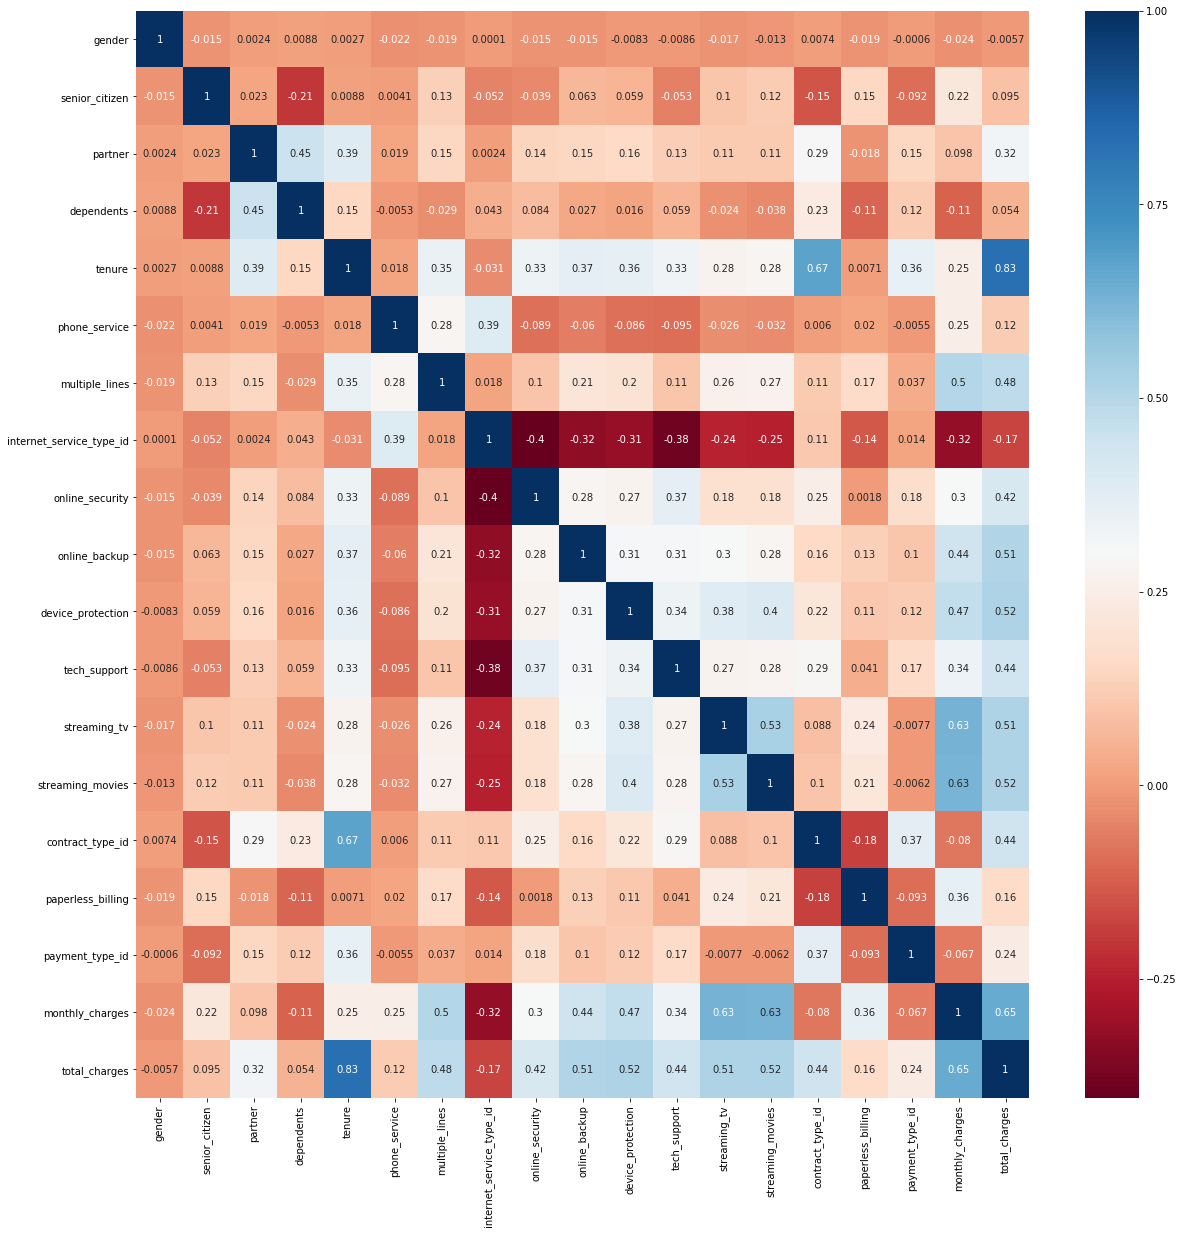

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(), cmap='RdBu', annot=True)


### High correlation among X variables to determine candidates for combining or eliminating
Partner and dependents: .44

Partner and tenure: .39

Streaming movies and streaming TV: .53

In [31]:
X_train.isna().sum()

gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
dtype: int64

### Combine 'partner' and 'dependents' variables into 'family'

In [32]:
X_train['family'] = X_train.partner + X_train.dependents

In [33]:
X_train['family'].replace({2:1}, inplace = True)

In [34]:
X_test['family'] = X_train.partner + X_train.dependents

In [35]:
X_test['family'].replace({2:1}, inplace = True)

### Combine two streaming variables to 'streaming'

In [36]:
X_train['streaming'] = X_train.streaming_tv + X_train.streaming_movies

In [37]:
X_train['streaming'].replace({2:1}, inplace = True)

In [38]:
X_test['streaming'] = X_train.streaming_tv + X_train.streaming_movies

In [39]:
X_test['streaming'].replace({2:1}, inplace = True)

In [40]:
X_train = X_train.drop(columns=['streaming_tv', 'streaming_movies', 'partner', 'dependents'])

### Combine 4 on-line service variables to 'services'

In [41]:
X_train['services'] = X_train.online_security + X_train.online_backup + X_train.device_protection 
+ X_train.tech_support

463     1
5817    0
1432    0
2885    0
3906    0
2001    1
4930    0
1588    0
6708    1
5193    0
6670    1
1139    0
3019    0
2570    0
4488    0
6009    0
6098    1
2246    0
3854    0
4362    1
5185    0
3499    1
6568    1
6680    1
4346    0
1166    0
1807    0
4479    0
3938    0
1094    1
       ..
6484    0
2050    1
4547    1
1847    1
1092    0
6752    0
6564    1
3325    1
2894    0
1363    0
3481    1
111     0
6368    0
942     0
5664    0
4169    0
4143    0
6782    0
6257    1
96      0
5857    0
1593    0
5243    0
6250    1
5862    0
5218    1
4060    0
1346    0
3454    1
3582    0
Name: tech_support, Length: 4922, dtype: int64

In [42]:
X_train['services'].replace({2:1, 3:1, 4:1}, inplace = True)

In [43]:
X_test['services'] = X_train.online_security + X_train.online_backup + X_train.device_protection 
+ X_train.tech_support

463     1
5817    0
1432    0
2885    0
3906    0
2001    1
4930    0
1588    0
6708    1
5193    0
6670    1
1139    0
3019    0
2570    0
4488    0
6009    0
6098    1
2246    0
3854    0
4362    1
5185    0
3499    1
6568    1
6680    1
4346    0
1166    0
1807    0
4479    0
3938    0
1094    1
       ..
6484    0
2050    1
4547    1
1847    1
1092    0
6752    0
6564    1
3325    1
2894    0
1363    0
3481    1
111     0
6368    0
942     0
5664    0
4169    0
4143    0
6782    0
6257    1
96      0
5857    0
1593    0
5243    0
6250    1
5862    0
5218    1
4060    0
1346    0
3454    1
3582    0
Name: tech_support, Length: 4922, dtype: int64

In [44]:
X_test['services'].replace({2:1, 3:1, 4:1}, inplace = True)

In [45]:
X_train = X_train.drop(columns=['online_security', 'online_backup', 'device_protection', 'tech_support'])

In [46]:
X_test = X_test.drop(columns=['online_security', 'online_backup', 'device_protection', 'tech_support'])

### Drop payment and billing variables as unnecessary for analysis

In [47]:
X_train = X_train.drop(columns=['payment_type_id', 'paperless_billing'])

In [48]:
X_test = X_test.drop(columns=['payment_type_id', 'paperless_billing'])

In [49]:
X_train.head()

,gender,senior_citizen,tenure,phone_service,multiple_lines,internet_service_type_id,contract_type_id,monthly_charges,total_charges,family,streaming,services
463,1,0,5,1,0,2,1,96.10,453.40,0,1,0
5817,0,1,18,1,0,1,1,49.85,865.75,0,0,1
1432,0,1,35,1,1,2,2,108.35,3726.15,0,1,1
2885,1,0,14,1,0,3,2,19.35,324.80,0,0,0
3906,0,0,13,1,0,3,1,20.30,275.40,0,0,0


In [50]:
#standard_scaler(X_train, X_test) #used standard scaler